In [24]:
import pandas as pd
import numpy as np

experiments = dict(
    p0='p=0'
)
seeds = [f's{i}' for i in range(1, 11)]
specialists = {}
stats = []

base_dir = '../../datalake/wcci'

for experiment, proportion in experiments.items():
    experiment_dir = f'{base_dir}/{experiment}/data/xdpole'
    specialist_data = f'{experiment_dir}/main_manager/main_stats'
    stats_data = f'{experiment_dir}/runstats'
    specialist_mean = []
    specialist_score = []
    for seed in seeds:
        seed_stats = pd.read_csv(f'{stats_data}/{seed}_run.csv')
        seed_test = pd.read_csv(f'{stats_data}/{seed}_test.csv')
        seed_specialist = pd.read_csv(f'{specialist_data}/{seed}_run.csv')
        specialist_score.append(
            list(seed_specialist.specialist_score)
        )

        cg = seed_specialist.query('specialist_score >= 0.8').specialist_score.count()
        g = seed_stats.gen.max()
        stats.append(dict(
            seed=seed,
            bestgfit=seed_stats.bestgfit.max(),
            generations=g,
            curriculum_proportion=proportion,
            curriculum_usage=cg/g,
            curriculum_generations=cg,
            score=seed_test.score[0]
        ))
        
    specialists[experiment] = specialist_score

df = pd.DataFrame(stats)

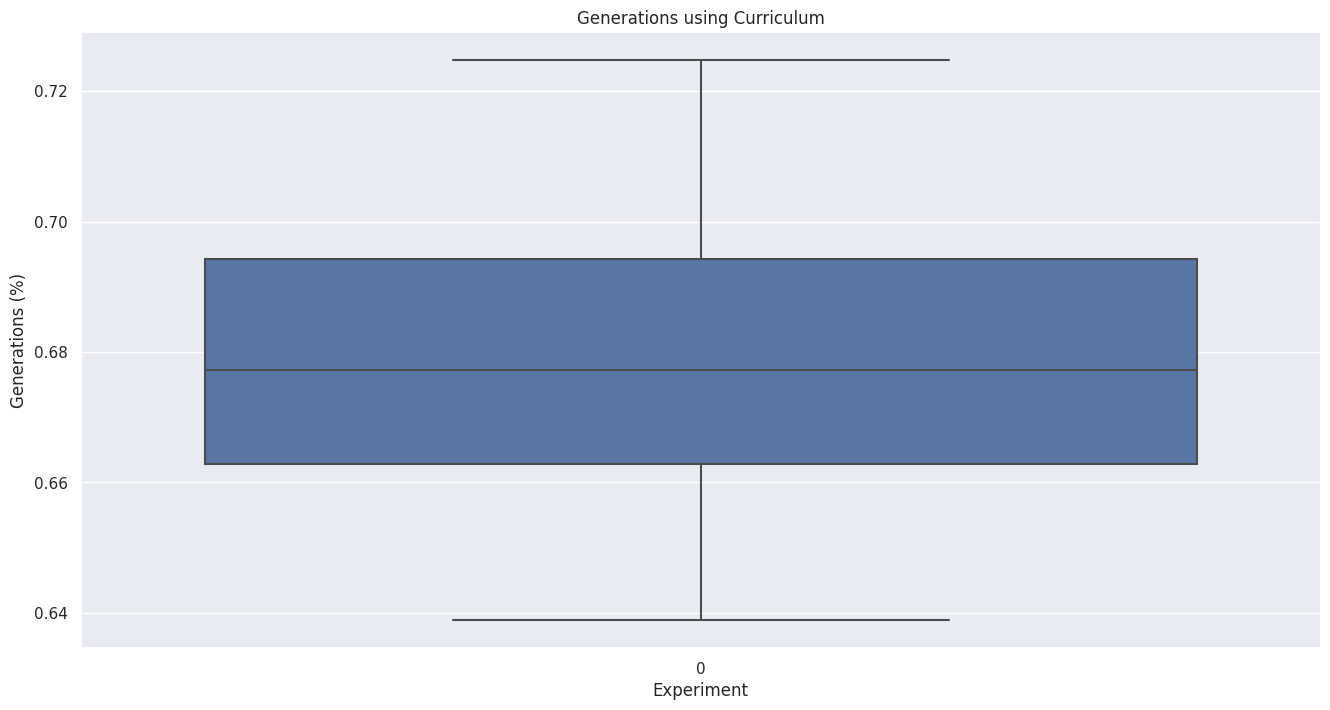

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={'figure.figsize':(16,8)})

sns.boxplot(df.curriculum_usage, flierprops={"marker": "x"})
plt.title("Generations using Curriculum")
plt.ylabel("Generations (%)")
plt.xlabel("Experiment")
plt.show()

<Axes: xlabel='generations', ylabel='curriculum_usage'>

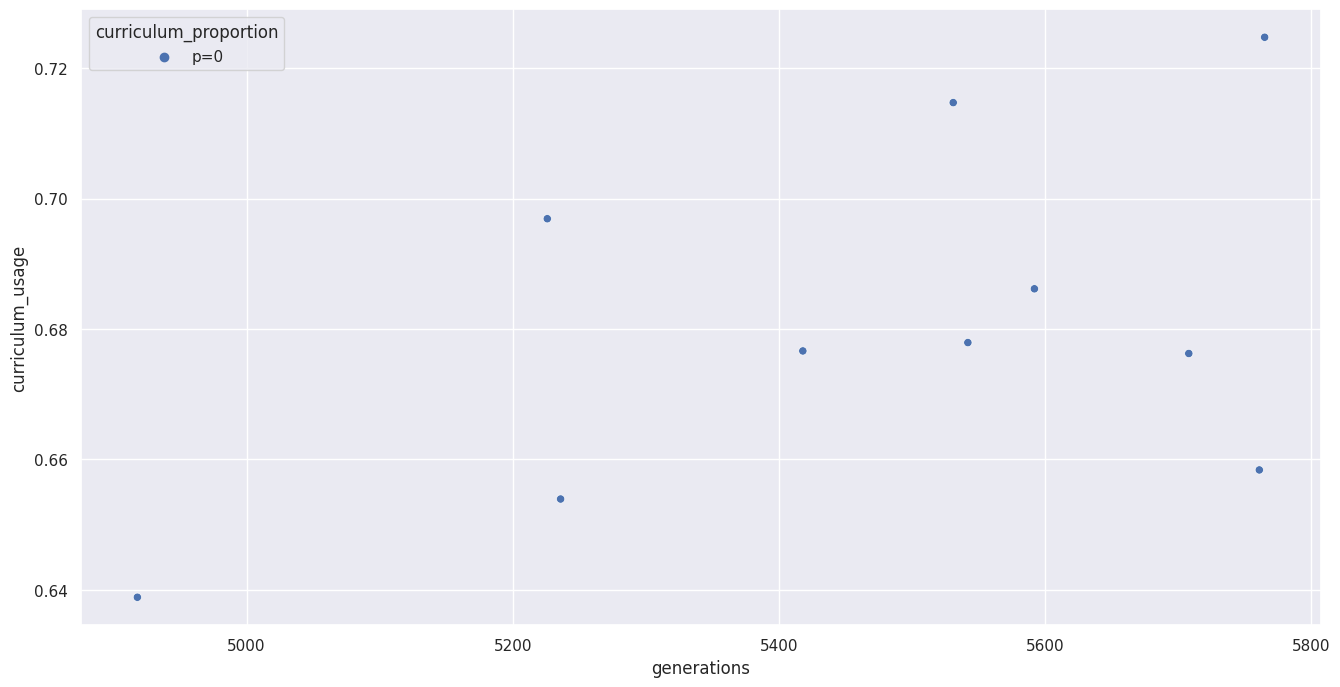

In [31]:
df = pd.DataFrame(stats)

sns.scatterplot(data=df, x='generations', y='curriculum_usage', hue='curriculum_proportion')